In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [3]:
import plotly.express as px
import pandas as pd
import numpy as np

coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/distan_lat42.22lon-8.63p2R1Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [4]:
import pandas as pd
import numpy as np

station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/LEVX_20192020.csv",
                          usecols =["time","wxcodes_o"],
                          parse_dates=["time"]).dropna().set_index("time")

pd.options.display.max_rows = 999
print("Weather frequencies\n")
station["wxcodes_o"].value_counts(normalize=True).map(lambda n: '{:.2%}'.format(n))

Weather frequencies



M              74.09%
BCFG            7.01%
FG              3.61%
-RA             2.10%
BR              1.55%
RA              1.21%
-RA BCFG        0.99%
RA BCFG         0.67%
BCFG -RA        0.66%
-RA BR          0.58%
RA FG           0.56%
-RA FG          0.56%
RA BR           0.55%
BCFG RA         0.50%
SHRA            0.42%
-DZ             0.34%
VCFG            0.33%
FG DZ           0.30%
FG -RA          0.29%
BCFG -DZ        0.22%
DZ              0.21%
FG RA           0.19%
-DZ FG          0.19%
FG -DZ          0.17%
DZ BCFG         0.16%
+RA FG          0.16%
DZ FG           0.15%
BCFG DZ         0.15%
DZ BR           0.13%
-DZ BCFG        0.13%
-RADZ BCFG      0.13%
-DZ BR          0.13%
+RA BCFG        0.10%
-RADZ           0.10%
+DZ FG          0.09%
-SHRA           0.09%
-RADZ BR        0.08%
+SHRA           0.07%
+RA BR          0.07%
BR RA           0.07%
+RA             0.07%
TS              0.07%
BR -DZ          0.06%
-RADZ FG        0.05%
FG -RADZ        0.05%
BR -RA    

In [5]:
#label ra/dz

station["prec_l"] = "No RA/DZ"
mask = station['wxcodes_o'].str.contains("RA")
station.loc[mask,["prec_l"]] = "RA/DZ"
mask = station['wxcodes_o'].str.contains("DZ")
station.loc[mask,["prec_l"]] = "RA/DZ"

print(station.sample(50))
print("*****************************")
station["prec_l"].value_counts(normalize=True).transform(lambda x: '{:,.0%}'.format(x))

                    wxcodes_o    prec_l
time                                   
2019-12-19 04:30:00         M  No RA/DZ
2019-06-09 02:00:00         M  No RA/DZ
2020-10-13 09:00:00        BR  No RA/DZ
2019-05-17 09:00:00         M  No RA/DZ
2019-01-10 02:00:00         M  No RA/DZ
2020-08-05 04:30:00         M  No RA/DZ
2020-07-16 19:30:00         M  No RA/DZ
2019-01-09 03:00:00         M  No RA/DZ
2019-08-22 22:30:00         M  No RA/DZ
2019-06-05 07:30:00      BCFG  No RA/DZ
2020-12-15 11:00:00         M  No RA/DZ
2019-08-03 14:00:00         M  No RA/DZ
2018-09-19 01:30:00         M  No RA/DZ
2019-08-28 22:30:00         M  No RA/DZ
2020-03-04 04:00:00  BCFG -RA     RA/DZ
2019-12-15 16:00:00        BR  No RA/DZ
2019-10-31 07:00:00      BCFG  No RA/DZ
2020-03-15 15:00:00       -RA     RA/DZ
2019-04-08 17:30:00         M  No RA/DZ
2019-05-12 07:00:00         M  No RA/DZ
2019-02-21 10:00:00         M  No RA/DZ
2019-11-05 08:30:00         M  No RA/DZ
2018-12-18 12:48:00       -RA     RA/DZ


No RA/DZ    87%
RA/DZ       13%
Name: prec_l, dtype: object

**Forecast D0**

In [6]:
#Forecast d0
model1k = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/lat42.22lon-8.63p2R1KmD0.csv",parse_dates=["time"]).set_index("time")

model1k

,Unnamed: 0,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,0,143.268921,0.0,1801.360962,0.789023,1.467980,103158.796875,280.410004,0.823894,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5730.042969,1595.621948,253.857193,283.275238
2019-01-01 02:00:00,1,152.222214,0.0,1766.035156,1.437459,2.645142,103178.460938,279.987000,0.822755,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5729.319824,1597.058472,253.848557,282.842499
2019-01-01 03:00:00,2,154.053619,0.0,1728.199341,1.304144,2.414089,103142.132812,279.750885,0.820316,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5724.619141,1593.626953,253.876816,282.377808
2019-01-01 04:00:00,3,162.321548,0.0,1716.658325,1.242218,2.291945,103172.617188,279.614197,0.806320,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5725.305664,1596.243408,253.810440,282.195923
2019-01-01 05:00:00,4,167.243256,0.0,1718.675293,0.790160,1.460847,103175.796875,279.555634,0.787751,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5724.179199,1596.257935,253.821121,282.136566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,16762,316.116913,0.0,800.844543,5.403949,10.236845,101375.132812,279.880554,0.861849,24050.560547,...,22.750000,-12.612812,0.0,0.000000,0.0,0.000000,5360.758301,1434.292603,243.570251,271.706177
2020-12-31 20:00:00,16763,318.488983,0.0,708.539551,4.331174,8.753118,101517.437500,279.643799,0.881646,24048.224609,...,34.250000,-4.223125,0.0,0.300000,0.1,0.300000,5362.556641,1437.166504,242.893250,271.008636
2020-12-31 21:00:00,16764,314.300262,0.0,763.025513,3.515929,6.365382,101593.578125,279.461945,0.917659,24056.218750,...,30.620001,-5.149188,0.0,0.070246,0.0,0.070246,5366.014160,1441.580811,242.227005,271.706116


In [7]:
#concat station file versus meteorological model file same time
df_all1k = pd.concat([station,model1k],axis=1).drop(columns=["wxcodes_o","Unnamed: 0"]).dropna()
df_all1k.sample(20)

,prec_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2020-11-24 06:00:00,No RA/DZ,174.615051,0.0,1704.623657,3.382160,6.783850,102178.562500,282.565674,0.850621,24067.287109,...,0.000000,-1.484375e-04,0.216538,0.000000,0.000000,0.216538,5619.985840,1507.668823,254.096817,278.766632
2019-02-01 04:00:00,RA/DZ,240.928192,0.0,534.197815,10.646819,18.988081,99023.453125,281.494263,0.823373,24061.435547,...,289.899994,-2.738984e+00,1.000000,0.550000,1.000000,1.000000,5188.750977,1263.204346,244.234680,273.105011
2019-11-10 03:00:00,No RA/DZ,270.241272,0.0,1318.902100,0.923036,1.630720,102353.523438,282.321136,0.913295,24080.750000,...,42.570000,-5.841891e+00,0.400000,0.578125,0.020000,0.578125,5560.291016,1501.510498,255.585434,272.912262
2020-10-23 03:00:00,No RA/DZ,141.197739,0.0,1498.059082,0.691800,1.294118,101799.843750,282.497559,0.984688,24047.808594,...,10.880000,-9.828625e+00,0.000000,0.145851,0.000000,0.145851,5524.344238,1481.203491,252.329132,276.736389
2020-04-28 01:00:00,No RA/DZ,184.859512,0.0,1247.498291,0.851751,6.755007,101460.304688,281.234985,0.994533,24043.613281,...,68.730003,-3.859961e+00,0.000000,0.481234,0.000000,0.481234,5473.116211,1450.287598,251.026245,274.749176
2019-09-04 17:00:00,No RA/DZ,11.459691,0.0,3203.738770,5.720829,10.843328,102138.273438,296.588623,0.551777,24135.000000,...,0.000000,3.632813e-05,0.000000,0.000000,0.000000,0.000000,5802.873535,1559.251831,262.927185,289.754181
2020-03-17 10:00:00,No RA/DZ,75.544106,0.0,1757.408569,6.225928,10.856037,102568.304688,286.709198,0.639893,24135.000000,...,0.000000,-1.601563e-05,0.000000,0.000000,0.000000,0.000000,5627.219238,1530.595459,252.624756,279.213379
2019-10-05 08:00:00,No RA/DZ,1.254269,0.0,2668.283203,0.779495,1.544688,101988.593750,283.889008,0.972546,24037.181641,...,0.000000,1.757812e-05,0.000000,0.000000,0.000000,0.000000,5743.276855,1512.291748,263.724701,285.826050
2020-08-26 03:00:00,No RA/DZ,3.264256,0.0,3239.855469,1.989994,4.000774,101882.718750,288.581390,0.999952,24036.972656,...,0.000000,2.617187e-05,0.000000,0.000000,0.000000,0.000000,5815.120117,1539.473267,267.567566,289.156799


**Scatter plot significant meteorological variables and prec_l**

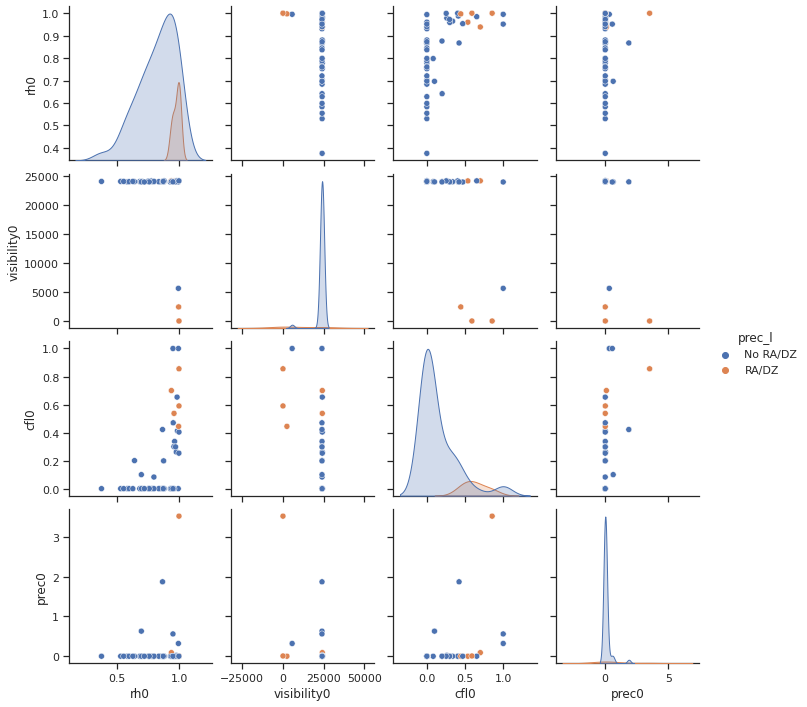

In [10]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df_all1k[["prec_l","rh0","visibility0","cfl0","prec0"]].sample(50), hue="prec_l");

**Scatter plot 3 PCA variables and prec_l**

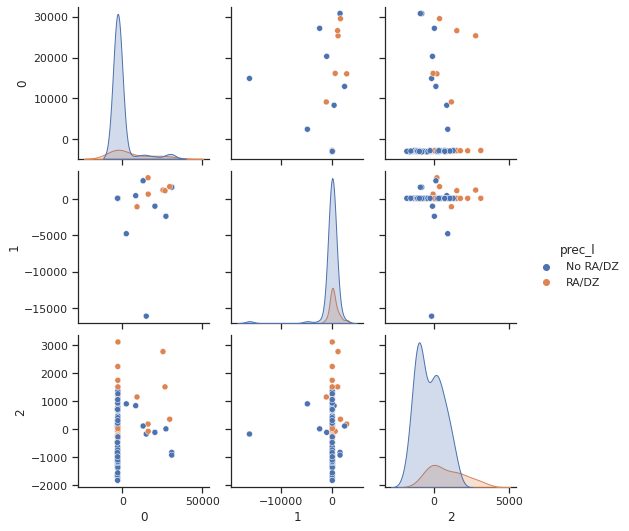

In [11]:
from sklearn.decomposition import PCA

df_pca = pd.DataFrame(PCA(n_components=3).fit_transform(df_all1k.iloc[:,1:]),
                                                        index =df_all1k.index)
df_pca["prec_l"] = df_all1k.prec_l
sns.pairplot(df_pca.sample(100), hue="prec_l");

**Meteorological model score Heidke Skill Score (HSS)**

In [24]:
from sklearn.metrics import classification_report

# HSS point 0
print("HSS point 0")
y_pred = np.asarray(["RA/DZ" if c>0 else "No RA/DZ" for c in df_all1k.prec0])
concat = pd.DataFrame({"y_pred":y_pred, "prec_l":df_all1k.prec_l})
cm = pd.crosstab(concat.prec_l,concat.y_pred ,margins=True,)
print(cm)
a = cm.values[0,0]
b = cm.values[1,0]
c = cm.values[0,1]
d = cm.values[1,1]
HSS_met0 = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
print("Heidke Skill Score:",round(HSS_met0,2))

print("\nQuality report Meteorological model point 0")
print(pd.DataFrame(classification_report(concat.prec_l, concat.y_pred,output_dict=True)).T)

# HSS point 1
print("\nHSS point 1")
y_pred = np.asarray(["RA/DZ" if c>0 else "No RA/DZ" for c in df_all1k.prec1])
concat = pd.DataFrame({"y_pred":y_pred, "prec_l":df_all1k.prec_l})
cm = pd.crosstab(concat.prec_l,concat.y_pred ,margins=True,)
print(cm)
a = cm.values[0,0]
b = cm.values[1,0]
c = cm.values[0,1]
d = cm.values[1,1]
HSS_met1 = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
print("Heidke Skill Score:",round(HSS_met1,2))

print("\nQuality report Meteorological model point 1")
print(pd.DataFrame(classification_report(concat.prec_l, concat.y_pred,output_dict=True)).T)

HSS point 0
y_pred    No RA/DZ  RA/DZ    All
prec_l                          
No RA/DZ     12938   1656  14594
RA/DZ          594   1279   1873
All          13532   2935  16467
Heidke Skill Score: 0.46

Quality report Meteorological model point 0
              precision    recall  f1-score       support
No RA/DZ       0.956104  0.886529  0.920003  14594.000000
RA/DZ          0.435775  0.682862  0.532030   1873.000000
accuracy       0.863363  0.863363  0.863363      0.863363
macro avg      0.695940  0.784695  0.726016  16467.000000
weighted avg   0.896920  0.863363  0.875874  16467.000000

HSS point 1
y_pred    No RA/DZ  RA/DZ    All
prec_l                          
No RA/DZ     12919   1675  14594
RA/DZ          585   1288   1873
All          13504   2963  16467
Heidke Skill Score: 0.46

Quality report Meteorological model point 1
              precision    recall  f1-score       support
No RA/DZ       0.956680  0.885227  0.919567  14594.000000
RA/DZ          0.434695  0.687667  0.5326

**Test association between observed variable and machine learning forecast (Pearson’s chi square test). Significance level (alpha) = 0.01**

In [26]:
from scipy.stats import chi2_contingency

#only cm point 1 similar point 0

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
sta, p, dof, exp = chi2_contingency(cm.iloc[0:2,0:2])

#degrees of freedoom (rows-1)*(columns-1) to test association between two variables
alpha = 0.01
print('\np-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Stadistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between machine learning forecast and observed values")
else:
    print("Retain H0,There is no association between machine learning forecast and observed values")


p-value: 0.0
Significance level: 0.01
Degres of of freedom:  1
Stadistic 3688.2787849442734
Reject H0,There is an association between machine learning forecast and observed values


In [27]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)


100%|██████████| 29/29 [01:10<00:00,  2.44s/it]


In [28]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.84,0.82,None,0.86,0.27
GaussianNB,0.82,0.82,None,0.85,0.11
BernoulliNB,0.82,0.81,None,0.85,0.18
QuadraticDiscriminantAnalysis,0.85,0.80,None,0.86,0.43
LGBMClassifier,0.92,0.75,None,0.92,1.28
LabelPropagation,0.90,0.74,None,0.90,8.40
LabelSpreading,0.90,0.74,None,0.90,17.14
LinearDiscriminantAnalysis,0.91,0.72,None,0.90,0.39
RandomForestClassifier,0.92,0.72,None,0.91,6.37


**ML LGBMClassifier**

In [34]:
# variables X
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501'],
      dtype='object')


Confusion matrix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2767    172  2939
RA/DZ          137    218   355
All           2904    390  3294
Heidke Skill Score: 0.53

Quality report (Machine Learning)

              precision  recall  f1-score  support
No RA/DZ           0.95    0.94      0.95  2939.00
RA/DZ              0.56    0.61      0.59   355.00
accuracy           0.91    0.91      0.91     0.91
macro avg          0.76    0.78      0.77  3294.00
weighted avg       0.91    0.91      0.91  3294.00

Confusion matrix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2713    172  2885
RA/DZ          150    259   409
All           2863    431  3294
Heidke Skill Score: 0.56

Quality report (Machine Learning)

              precision  recall  f1-score  support
No RA/DZ           0.95    0.94      0.94  2885.00
RA/DZ              0.60    0.63      0.62   409.00
accuracy           0.

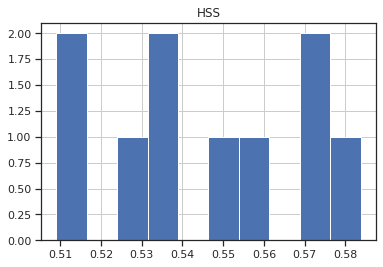

In [33]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

# loop random seed(1)
np.random.seed(1)
HSS_ml = []

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #ml model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)
  #ml_model = BernoulliNB().fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion matrix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_ml.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_ml[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000

print(pd.DataFrame(HSS_ml,columns=["HSS"]).describe())

sta, p = shapiro(HSS_ml)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_ml,columns=["HSS"]).hist();


**T test (1sample) compare machine learning HSS in a sample (n=10) versus meteorological model HSS at point 0 (0.46) and at point 1 (0.46). the alternative hypothesis is: the mean of HSS of the underlying distribution of the sample is greater than the given population HSS from meteorological model (popmean). Significance level (alpha) = 0.01**

In [38]:
import scipy.stats as stats

alpha = 0.01
sta0, p_value0 = stats.ttest_1samp(HSS_ml, popmean=0.46, alternative="greater")

print("\nalpha: ",alpha)
print("\nHSS list from machine learning test:",np.round(HSS_ml,2))
print("\np_value point 0:",p_value0)

if p_value0 < alpha:    
    print("\nwe are rejecting null hypothesis  H0:  HSS mean machine learning= HSS meteorological model point 0")
    print("\nwe are accepting alternative hypothesis: HSS mean machine learning is greater than HSS meteorological point 0")
else:
    print("\nwe are accepting null hypothesis:  H0 HSS mean machine learning = HSS meteorological model point 0")





alpha:  0.01

HSS list from machine learning test: [0.53 0.56 0.53 0.57 0.58 0.55 0.57 0.51 0.51 0.53]

p_value point 0: 1.4202690457399403e-06

we are rejecting null hypothesis  H0:  HSS mean machine learning= HSS meteorological model point 0

we are accepting alternative hypothesis: HSS mean machine learning is greater than HSS meteorological point 0


**Add time features**

In [39]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.weekofyear

In [40]:

# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)
models

100%|██████████| 29/29 [01:22<00:00,  2.86s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.84,0.84,None,0.86,0.11
BernoulliNB,0.84,0.83,None,0.86,0.19
NearestCentroid,0.85,0.83,None,0.87,0.17
QuadraticDiscriminantAnalysis,0.86,0.80,None,0.87,0.23
LabelPropagation,0.90,0.74,None,0.90,11.07
LabelSpreading,0.90,0.74,None,0.90,20.20
KNeighborsClassifier,0.91,0.74,None,0.91,1.71
LinearDiscriminantAnalysis,0.91,0.73,None,0.91,0.61
LGBMClassifier,0.92,0.73,None,0.91,1.40


In [41]:
# variables X
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'hour', 'month', 'dayofyear',
       'weekofyear'],
      dtype='object')

**LGBMClassifier with time variables**


Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2770    169  2939
RA/DZ          145    210   355
All           2915    379  3294
Heidke Skill Score: 0.52

Quality report (Machine Learning)

              precision  recall  f1-score  support
No RA/DZ           0.95    0.94      0.95  2939.00
RA/DZ              0.55    0.59      0.57   355.00
accuracy           0.90    0.90      0.90     0.90
macro avg          0.75    0.77      0.76  3294.00
weighted avg       0.91    0.90      0.91  3294.00

Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2720    165  2885
RA/DZ          154    255   409
All           2874    420  3294
Heidke Skill Score: 0.56

Quality report (Machine Learning)

              precision  recall  f1-score  support
No RA/DZ           0.95    0.94      0.94  2885.00
RA/DZ              0.61    0.62      0.62   409.00
accuracy           0.90

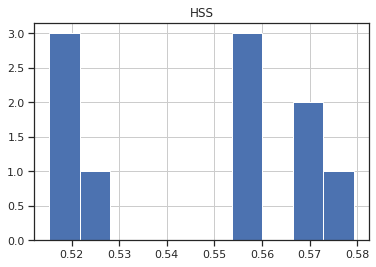

In [49]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

# loop random seed (1)
np.random.seed(1)
HSS_t = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #machine learning model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion marix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_t.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_t[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
print(pd.DataFrame(HSS_t,columns=["HSS"]).describe())

# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
sta, p = shapiro(HSS_t)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_t,columns=["HSS"]).hist();


**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the HSS mean of the distribution underlying the sample without time variables is less than the HSS mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [47]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS_ml, HSS_t, alternative="less")

print("\nHSS without time variables:", np.round(HSS_ml,3))
print("\nHSS with time variables:", np.round(HSS_t,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the sample without time variables inputs is less than the HSS mean of the sample with time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables")


HSS without time variables: [0.532 0.561 0.529 0.572 0.584 0.551 0.57  0.511 0.509 0.531]

HSS with time variables: [0.519 0.56  0.519 0.567 0.568 0.559 0.579 0.522 0.515 0.558]

alpha:  0.01

p_value point:  0.36236446746696854

we are accepting null hypothesis:  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables


****

**Save Machine learning model**

In [ ]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("prec_LEVX_1km_time_d0.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=200))])


In [ ]:
import sklearn
print(sklearn.__version__)

0.24.1


**ExtraTreesClassifier too big to be upload at github!!**


Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2746    193  2939
RA/DZ          104    251   355
All           2850    444  3294
Heidke Skill Score: 0.58

Quality report (Machine Learning)

              precision  recall  f1-score  support
No RA/DZ           0.96    0.93      0.95  2939.00
RA/DZ              0.57    0.71      0.63   355.00
accuracy           0.91    0.91      0.91     0.91
macro avg          0.76    0.82      0.79  3294.00
weighted avg       0.92    0.91      0.91  3294.00

Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2706    197  2903
RA/DZ          100    291   391
All           2806    488  3294
Heidke Skill Score: 0.61

Quality report (Machine Learning)

              precision  recall  f1-score  support
No RA/DZ           0.96    0.93      0.95  2903.00
RA/DZ              0.60    0.74      0.66   391.00
accuracy           0.91

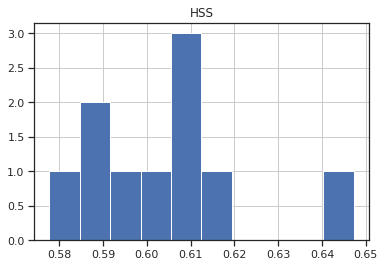

In [50]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

# loop random seed (1)
np.random.seed(1)
HSS_plus = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #machine learning model
  ml_model = ExtraTreesClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion marix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_plus.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_plus[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
print(pd.DataFrame(HSS_plus,columns=["HSS"]).describe())

# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
sta, p = shapiro(HSS_plus)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_plus,columns=["HSS"]).hist();

**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the HSS mean of the distribution underlying the sample without time variables is less than the HSS mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [51]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS_t, HSS_plus, alternative="less")

print("\nHSS with LGBMClassifier:", np.round(HSS_t,3))
print("\nHSS with ExtraTreesClassifier:", np.round(HSS_plus,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HSS mean LGBMClassifier = HSS mean ExtraTreesClassifier")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the  LGBMClassifier is less than the HSS mean of ExtraTreesClassifier")
else:
    print("\nwe are accepting null hypothesis:  H0: LGBMClassifier = HSS mean ExtraTreesClassifier")


HSS with LGBMClassifier: [0.519 0.56  0.519 0.567 0.568 0.559 0.579 0.522 0.515 0.558]

HSS with ExtraTreesClassifier: [0.578 0.611 0.586 0.61  0.647 0.616 0.589 0.596 0.604 0.609]

alpha:  0.01

p_value point:  7.836755176715589e-06

we are rejecting null hypothesis  H0: HSS mean LGBMClassifier = HSS mean ExtraTreesClassifier

we are accepting alternative hypothesis: the HSS mean of the  LGBMClassifier is less than the HSS mean of ExtraTreesClassifier
